# Regression 02 : AirQuality

#### 머신러닝 코드 구조 <br>

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")



# [2] NA 처리 + Feature Engineering + Dummy Variable

In [3]:
#라이브러리들을 불러오자.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
data_path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple.csv'
data = pd.read_csv(data_path)

## 20.데이터 준비

### 21.변수 정리

### 22.NA 처리

* ffill로 채워봅시다.

In [5]:
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [6]:
# 다시 NA가 몇건 있는지 살펴봅시다.
data = data.fillna(method = 'ffill')
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [ ]:
# 시계열 데이터일 경우 쉬운 결정 : 이전 데이터로 채우기




* 이번에는 knn Imputation을 사용하여 추정해서 넣어 봅시다.  
    그러나 이 방법은 순서상 data split 이후에 진행합니다.

### 23.Feature Engineering

* 날짜 변수 만들기  
airquality 데이터는 1973년 5~9월까지 데이터 입니다.  
month, day 데이터를 날짜 형식으로 변환해 봅시다.

(중요!)날짜변수를 만드는 이유!  
* 날짜로 부터 추가 변수를 도출해 내기 위해서 날짜 변수를 만듭니다.  
* 만약 추가변수 도출이 끝나면, 날짜변수는 제거합니다.

In [8]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,313.0,14.3,56,5,5


In [10]:
# 날짜를 yyyymmdd로 만든 후 변환해봅시다.
data['Date'] = pd.to_datetime(1973*10000 + data.Month*100 + data.Day
                              ,format='%Y%m%d')

data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Date
0,41,190.0,7.4,67,5,1,1973-05-01
1,36,118.0,8.0,72,5,2,1973-05-02
2,12,149.0,12.6,74,5,3,1973-05-03
3,18,313.0,11.5,62,5,4,1973-05-04
4,19,313.0,14.3,56,5,5,1973-05-05


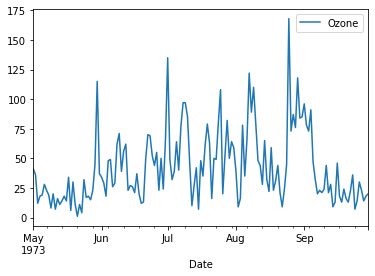

In [11]:
# 기간별 Ozone 차트를 그려봅시다.
data.plot(x='Date',y='Ozone')
plt.show()

* 날짜로 부터 날짜요소 추출하기

In [12]:
# 요일을 추가해 봅시다. 
data['WeekDay'] = data.Date.dt.dayofweek
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Date,WeekDay
0,41,190.0,7.4,67,5,1,1973-05-01,1
1,36,118.0,8.0,72,5,2,1973-05-02,2
2,12,149.0,12.6,74,5,3,1973-05-03,3
3,18,313.0,11.5,62,5,4,1973-05-04,4
4,19,313.0,14.3,56,5,5,1973-05-05,5


In [13]:
# 아래 코드 끝에 . 을 찍으면 추출할 수 있는 날짜 요소를 확인할수 있습니다.
data.Date.dt.

SyntaxError: invalid syntax (<ipython-input-13-9ad7f8645ca7>, line 2)

In [18]:
# 날짜로 부터 변수 한 개 추가해 봅시다.

data['WeekNum'] = data.Date.dt.week
data.head(20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Ozone,Solar.R,Wind,Temp,Month,Day,Date,WeekDay,WeekNum,Ozone_lag1,Temp_lag1,Wind_lag1,Solar.R_lag1,Ozone_diff
0,41,190.0,7.4,67,5,1,1973-05-01,1,18,NaN,NaN,NaN,NaN,NaN
1,36,118.0,8.0,72,5,2,1973-05-02,2,18,41.0,67.0,7.4,190.0,NaN
2,12,149.0,12.6,74,5,3,1973-05-03,3,18,36.0,72.0,8.0,118.0,5.0
3,18,313.0,11.5,62,5,4,1973-05-04,4,18,12.0,74.0,12.6,149.0,24.0
4,19,313.0,14.3,56,5,5,1973-05-05,5,18,18.0,62.0,11.5,313.0,-6.0
5,28,313.0,14.9,66,5,6,1973-05-06,6,18,19.0,56.0,14.3,313.0,-1.0
6,23,299.0,8.6,65,5,7,1973-05-07,0,19,28.0,66.0,14.9,313.0,-9.0
7,19,99.0,13.8,59,5,8,1973-05-08,1,19,23.0,65.0,8.6,299.0,5.0
8,8,19.0,20.1,61,5,9,1973-05-09,2,19,19.0,59.0,13.8,99.0,4.0
9,20,194.0,8.6,69,5,10,1973-05-10,3,19,8.0,61.0,20.1,19.0,11.0


* 이전 데이터 붙이기.  
    - .shift()  
    - 예) 전날 오존농도, 전날 온도

In [15]:
# 전날 오존 농도를 추가합니다.
data['Ozone_lag1'] = data['Ozone'].shift() # default = 1
data.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day,Date,WeekDay,WeekNum,Ozone_lag1
0,41,190.0,7.4,67,5,1,1973-05-01,1,18,NaN
1,36,118.0,8.0,72,5,2,1973-05-02,2,18,41.0
2,12,149.0,12.6,74,5,3,1973-05-03,3,18,36.0
3,18,313.0,11.5,62,5,4,1973-05-04,4,18,12.0
4,19,313.0,14.3,56,5,5,1973-05-05,5,18,18.0
5,28,313.0,14.9,66,5,6,1973-05-06,6,18,19.0
6,23,299.0,8.6,65,5,7,1973-05-07,0,19,28.0
7,19,99.0,13.8,59,5,8,1973-05-08,1,19,23.0
8,8,19.0,20.1,61,5,9,1973-05-09,2,19,19.0
9,20,194.0,8.6,69,5,10,1973-05-10,3,19,8.0


다음의 feature들을 추가해 봅시다.

In [16]:
# 전날 온도, 전날 바람세기, 전날 solar.R
data['Temp_lag1'] = data['Temp'].shift()
data['Wind_lag1'] = data['Wind'].shift()
data['Solar.R_lag1'] = data['Solar.R'].shift()

In [17]:
# 전전날 오존농도 대비 전날 오존농도 증감
data['Ozone_diff'] = data.Ozone.shift(2) - data['Ozone_lag1'] 
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Date,WeekDay,WeekNum,Ozone_lag1,Temp_lag1,Wind_lag1,Solar.R_lag1,Ozone_diff
0,41,190.0,7.4,67,5,1,1973-05-01,1,18,NaN,NaN,NaN,NaN,NaN
1,36,118.0,8.0,72,5,2,1973-05-02,2,18,41.0,67.0,7.4,190.0,NaN
2,12,149.0,12.6,74,5,3,1973-05-03,3,18,36.0,72.0,8.0,118.0,5.0
3,18,313.0,11.5,62,5,4,1973-05-04,4,18,12.0,74.0,12.6,149.0,24.0
4,19,313.0,14.3,56,5,5,1973-05-05,5,18,18.0,62.0,11.5,313.0,-6.0


In [ ]:
data.head(10)

* 이동평균 변수 붙이기  
    - .roll()  
    - 예) 7일 이동평균 오존농도


In [19]:
# 7일 이동평균 오존농도
data['Ozone_MA_7_lag1'] = data['Ozone'].rolling(7, min_periods=1).mean().shift()#min_periods=1 은 7개가 아니고 1개라도 있어도 계산해라!
data.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day,Date,WeekDay,WeekNum,Ozone_lag1,Temp_lag1,Wind_lag1,Solar.R_lag1,Ozone_diff,Ozone_MA_7_lag1
0,41,190.0,7.4,67,5,1,1973-05-01,1,18,NaN,NaN,NaN,NaN,NaN,NaN
1,36,118.0,8.0,72,5,2,1973-05-02,2,18,41.0,67.0,7.4,190.0,NaN,41.000000
2,12,149.0,12.6,74,5,3,1973-05-03,3,18,36.0,72.0,8.0,118.0,5.0,38.500000
3,18,313.0,11.5,62,5,4,1973-05-04,4,18,12.0,74.0,12.6,149.0,24.0,29.666667
4,19,313.0,14.3,56,5,5,1973-05-05,5,18,18.0,62.0,11.5,313.0,-6.0,26.750000
5,28,313.0,14.9,66,5,6,1973-05-06,6,18,19.0,56.0,14.3,313.0,-1.0,25.200000
6,23,299.0,8.6,65,5,7,1973-05-07,0,19,28.0,66.0,14.9,313.0,-9.0,25.666667
7,19,99.0,13.8,59,5,8,1973-05-08,1,19,23.0,65.0,8.6,299.0,5.0,25.285714
8,8,19.0,20.1,61,5,9,1973-05-09,2,19,19.0,59.0,13.8,99.0,4.0,22.142857
9,20,194.0,8.6,69,5,10,1973-05-10,3,19,8.0,61.0,20.1,19.0,11.0,18.142857


In [20]:
# 3일 이동평균 온도를 추가합시다.
data['Temp_MA_3_lag1'] = data['Temp'].rolling(3, min_periods=1).mean().shift()#min_periods=1 은 3개가 아니고 1개라도 있어도 계산해라!
data.head(10)


,Ozone,Solar.R,Wind,Temp,Month,Day,Date,WeekDay,WeekNum,Ozone_lag1,Temp_lag1,Wind_lag1,Solar.R_lag1,Ozone_diff,Ozone_MA_7_lag1,Temp_MA_3_lag1
0,41,190.0,7.4,67,5,1,1973-05-01,1,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,118.0,8.0,72,5,2,1973-05-02,2,18,41.0,67.0,7.4,190.0,NaN,41.000000,67.000000
2,12,149.0,12.6,74,5,3,1973-05-03,3,18,36.0,72.0,8.0,118.0,5.0,38.500000,69.500000
3,18,313.0,11.5,62,5,4,1973-05-04,4,18,12.0,74.0,12.6,149.0,24.0,29.666667,71.000000
4,19,313.0,14.3,56,5,5,1973-05-05,5,18,18.0,62.0,11.5,313.0,-6.0,26.750000,69.333333
5,28,313.0,14.9,66,5,6,1973-05-06,6,18,19.0,56.0,14.3,313.0,-1.0,25.200000,64.000000
6,23,299.0,8.6,65,5,7,1973-05-07,0,19,28.0,66.0,14.9,313.0,-9.0,25.666667,61.333333
7,19,99.0,13.8,59,5,8,1973-05-08,1,19,23.0,65.0,8.6,299.0,5.0,25.285714,62.333333
8,8,19.0,20.1,61,5,9,1973-05-09,2,19,19.0,59.0,13.8,99.0,4.0,22.142857,63.333333
9,20,194.0,8.6,69,5,10,1973-05-10,3,19,8.0,61.0,20.1,19.0,11.0,18.142857,61.666667


In [ ]:
data.head(10)

### 24.Dummy Variable
    * 범주형 변수를 숫자로 만드는 방법
    * pd.get_dummies, pd.concat, (Pandas Dataframe).drop
    * 불필요한 칼럼들 제거


In [26]:
data_wd_tmp = pd.get_dummies(data['WeekDay'], prefix = 'W', drop_first = 0)
data_wd_tmp.head(10)

,W_0,W_1,W_2,W_3,W_4,W_5,W_6
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0


In [21]:
# dummy variable
data_wd = pd.get_dummies(data['WeekDay'], prefix = 'W', drop_first = 1)
#W_0 칼럼을 삭제한다. 왜냐 W_1 ~ W_6 이 모두 0이면, 판단할 수 있기에
#빠른이해>남자, 여자를 부분하는 예제를 만든다고 생각하면 이해가 빠르다. 그냥 만들면, 0 1 / 1 0 인데 결국 0 / 1 로 구분되니 하나를 drop해도 된다!

In [22]:
data_wd.head()

,W_1,W_2,W_3,W_4,W_5,W_6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [23]:
data2 = pd.concat([data, data_wd], axis=1)

In [24]:
data2.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Date,WeekDay,WeekNum,Ozone_lag1,...,Solar.R_lag1,Ozone_diff,Ozone_MA_7_lag1,Temp_MA_3_lag1,W_1,W_2,W_3,W_4,W_5,W_6
0,41,190.0,7.4,67,5,1,1973-05-01,1,18,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,0
1,36,118.0,8.0,72,5,2,1973-05-02,2,18,41.0,...,190.0,NaN,41.000000,67.000000,0,1,0,0,0,0
2,12,149.0,12.6,74,5,3,1973-05-03,3,18,36.0,...,118.0,5.0,38.500000,69.500000,0,0,1,0,0,0
3,18,313.0,11.5,62,5,4,1973-05-04,4,18,12.0,...,149.0,24.0,29.666667,71.000000,0,0,0,1,0,0
4,19,313.0,14.3,56,5,5,1973-05-05,5,18,18.0,...,313.0,-6.0,26.750000,69.333333,0,0,0,0,1,0


* 불필요한 변수를 제거합시다.

어떤 변수가 불필요한가요?

In [27]:
# 칼럼삭제
drop_x = ['Solar.R','Wind','Temp','Month','Day','Date','WeekDay']
data2.drop(drop_x, axis = 1, inplace = True)

In [28]:
data2.head()

,Ozone,WeekNum,Ozone_lag1,Temp_lag1,Wind_lag1,Solar.R_lag1,Ozone_diff,Ozone_MA_7_lag1,Temp_MA_3_lag1,W_1,W_2,W_3,W_4,W_5,W_6
0,41,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
1,36,18,41.0,67.0,7.4,190.0,NaN,41.000000,67.000000,0,1,0,0,0,0
2,12,18,36.0,72.0,8.0,118.0,5.0,38.500000,69.500000,0,0,1,0,0,0
3,18,18,12.0,74.0,12.6,149.0,24.0,29.666667,71.000000,0,0,0,1,0,0
4,19,18,18.0,62.0,11.5,313.0,-6.0,26.750000,69.333333,0,0,0,0,1,0


In [31]:
data2.isnull().sum()

Ozone              0
WeekNum            0
Ozone_lag1         1
Temp_lag1          1
Wind_lag1          1
Solar.R_lag1       1
Ozone_diff         2
Ozone_MA_7_lag1    1
Temp_MA_3_lag1     1
W_1                0
W_2                0
W_3                0
W_4                0
W_5                0
W_6                0
dtype: int64

In [32]:
data2 = data2.fillna(method = 'bfill')
data2.head()

,Ozone,WeekNum,Ozone_lag1,Temp_lag1,Wind_lag1,Solar.R_lag1,Ozone_diff,Ozone_MA_7_lag1,Temp_MA_3_lag1,W_1,W_2,W_3,W_4,W_5,W_6
0,41,18,41.0,67.0,7.4,190.0,5.0,41.000000,67.000000,1,0,0,0,0,0
1,36,18,41.0,67.0,7.4,190.0,5.0,41.000000,67.000000,0,1,0,0,0,0
2,12,18,36.0,72.0,8.0,118.0,5.0,38.500000,69.500000,0,0,1,0,0,0
3,18,18,12.0,74.0,12.6,149.0,24.0,29.666667,71.000000,0,0,0,1,0,0
4,19,18,18.0,62.0,11.5,313.0,-6.0,26.750000,69.333333,0,0,0,0,1,0


### 25.Data Split

데이터셋을 나눠봅시다.  
위 코드를 참조해서 직접 코드를 작성합시다. 


In [33]:
# features와 target 분리
X = data2.drop('Ozone', axis=1)# == data.iloc[:, 1:]
y = data.iloc[:, 0]

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
rain_x, train_y = train_x.values, train_y.values
test_x, test_y = test_x.values, test_y.values

print(train_x.shape, train_y.shape)

(107, 14) (107,)


### 26.Scaling features




## 30.모델링
모델링을 다시 수행해 봅시다.

### 31.import

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### 32.모델선언

In [37]:
# 모델 선언
multi_regression =  LinearRegression()


### 33.모델링(학습)

In [38]:
multi_regression.fit(train_x, train_y)


LinearRegression()

In [39]:
# 회귀계수 살펴보기. 모델을 열어 보자
print(X.columns.tolist())
print(multi_regression.coef_    )        # 회귀계수
print(multi_regression.intercept_    )        # y절편

['WeekNum', 'Ozone_lag1', 'Temp_lag1', 'Wind_lag1', 'Solar.R_lag1', 'Ozone_diff', 'Ozone_MA_7_lag1', 'Temp_MA_3_lag1', 'W_1', 'W_2', 'W_3', 'W_4', 'W_5', 'W_6']
[-0.29763406  0.28741165  0.86792886 -0.42984621 -0.04329764 -0.02621569
 -0.10253349  0.63435934  8.5112385  -9.94161447 -9.79748524 -4.8058917
 10.19870885 -0.06684197]
-62.00038805567363


### 34.예측

In [40]:
# 예측값을 뽑자.
test_pred = multi_regression.predict(test_x)


### 35.평가

In [42]:
#test set에서의 성능 확인
# MSE, 
print(mean_squared_error(test_y, test_pred))

# RMSE
print(mean_squared_error(test_y, test_pred, squared=0))#squared 가 제곱의 의미기에 루트가 제곱을 제거하는 것이기에 0으로 설정하는 것이다.

# MAE
print(mean_absolute_error(test_y  , test_pred))


594.5787059705366
24.383984620453987
18.185562198679346
